In [ ]:
# edge-based segmentation

In [ ]:
import cv2
import numpy as np

In [ ]:
# Load the kidney stone image (replace 'image_path' with the actual image file path)
image = cv2.imread('Kidney_stone.png', cv2.IMREAD_GRAYSCALE)

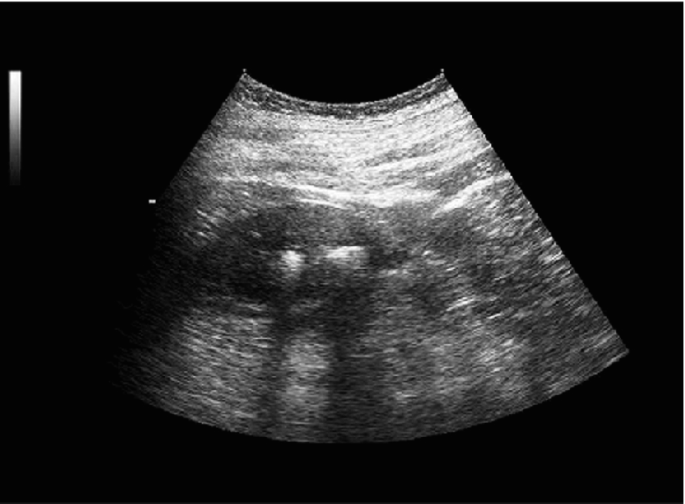

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
# Perform pre-processing if necessary (e.g., resizing, noise removal, contrast enhancement)

# Apply Canny edge detection
edges = cv2.Canny(image, threshold1=30, threshold2=100)  # Adjust thresholds as needed

In [ ]:
# Find contours in the edge image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Create a black background image to draw the segmented kidney stones
edgebased_image = np.zeros_like(image)

In [ ]:
# Draw the contours of the kidney stones on the segmented image
cv2.drawContours(edgebased_image, contours, -1, (255), thickness=cv2.FILLED)

array([[  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255, 255,   0],
       ...,
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255,   0]], dtype=uint8)

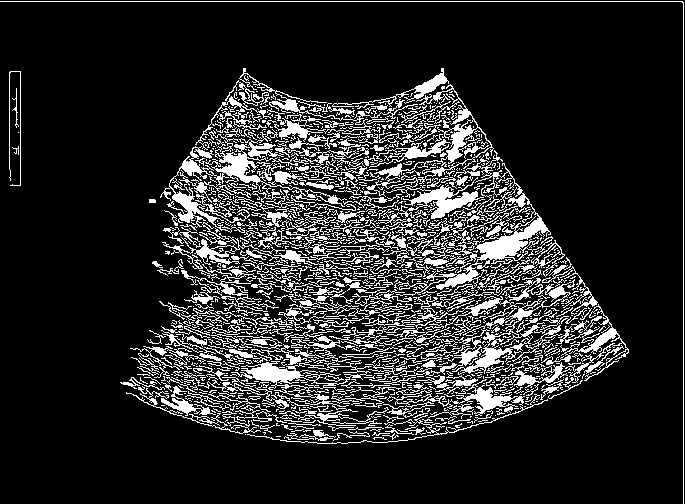

In [ ]:
# Display the segmented image
from google.colab.patches import cv2_imshow
cv2_imshow(edgebased_image)

In [ ]:
# threshold based image segmentation

In [ ]:
# Perform pre-processing if necessary (e.g., resizing, noise removal, contrast enhancement)

# Apply thresholding to segment kidney stones
threshold_value = 100  # Adjust the threshold value as needed
_, threshold_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

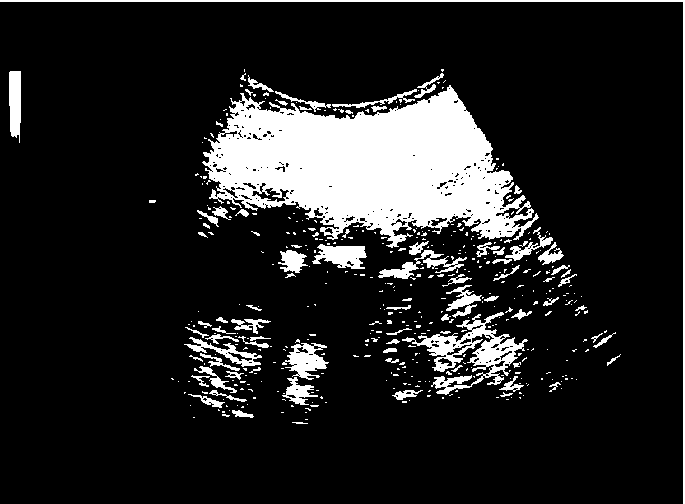

In [ ]:
# Display the segmented image
cv2_imshow(threshold_image)

In [ ]:
# region based segmentation

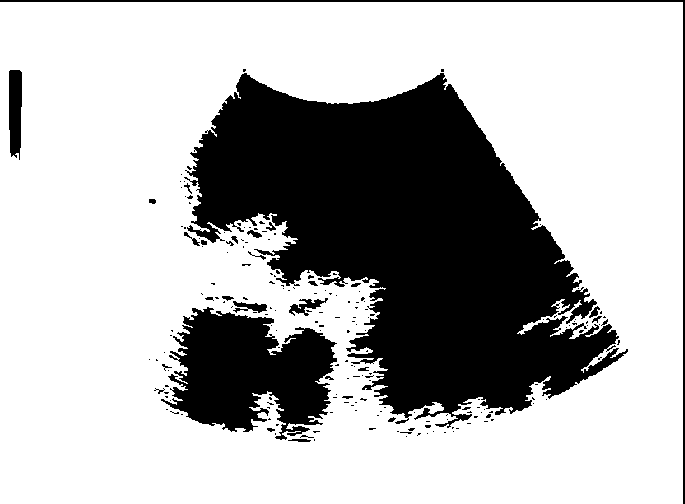

In [ ]:
# Perform pre-processing if necessary (e.g., resizing, noise removal, contrast enhancement)

# Initialize seed point (choose a seed point within a kidney stone region)
seed_point = (100, 100)  # Adjust the seed point coordinates as needed

# Create a mask for region growing
mask = np.zeros_like(image, dtype=np.uint8)

# Initialize region growing parameters
neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # 4-connectivity
threshold = 50  # Adjust the threshold value as needed

# Region-growing function using a stack
def region_growing(image, mask, seed, threshold):
    stack = [seed]

    while stack:
        x, y = stack.pop()

        if not (0 <= x < image.shape[0] and 0 <= y < image.shape[1]):
            continue

        if mask[x, y] == 0 and abs(int(image[x, y]) - int(image[seed])) < threshold:
            mask[x, y] = 255  # Mark the pixel as part of the region

            # Add neighboring pixels to the stack
            for dx, dy in neighbors:
                stack.append((x + dx, y + dy))

# Perform region growing from the seed point
region_growing(image, mask, seed_point, threshold)

# Display the segmented region
cv2_imshow(mask)


In [ ]:
# cluster based segmentation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


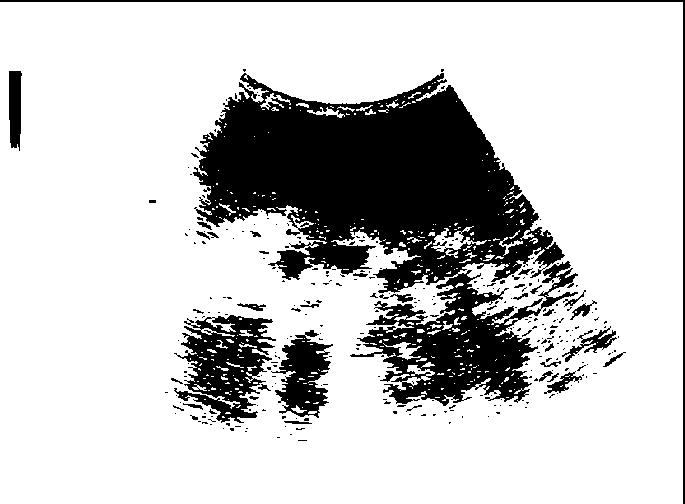

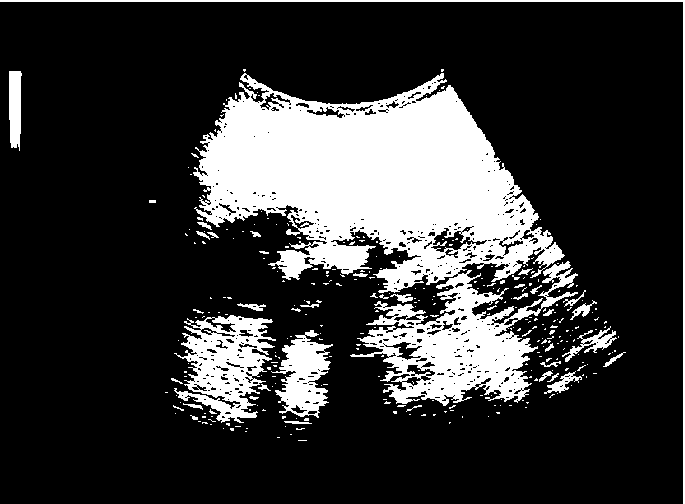

In [ ]:
from sklearn.cluster import KMeans

same_image = cv2.imread('Kidney_stone.png')

# Perform pre-processing if necessary (e.g., resizing, noise removal, contrast enhancement)

# Convert the image to a flat list of pixels with intensity values
pixel_values = same_image.reshape((-1, 3))  # Assuming a color image (3 channels)

# Define the number of clusters (you can adjust this)
num_clusters = 2  # Adjust the number of clusters as needed

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixel_values)

# Get the cluster labels for each pixel
cluster_labels = kmeans.labels_

# Reshape the cluster labels to match the original image shape
cluster_labels = cluster_labels.reshape(same_image.shape[0], same_image.shape[1])

# Create masks for each cluster
segmented_masks = []
for cluster_id in range(num_clusters):
    mask_cluster = np.zeros_like(cluster_labels)
    mask_cluster[cluster_labels == cluster_id] = 255
    segmented_masks.append(mask_cluster)

# Display the segmented regions
for i, mask_cluster in enumerate(segmented_masks):
    cv2_imshow(mask_cluster)


In [ ]:
# watershed segmentation

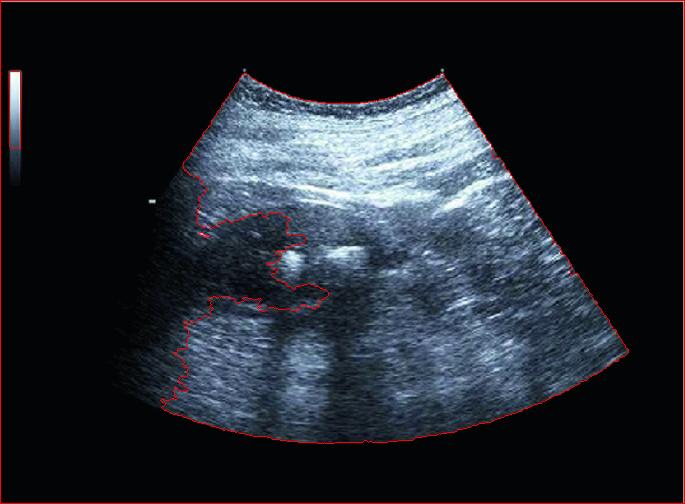

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
ori_image = cv2.imread('Kidney_stone.png')
b,g,r = cv2.split(ori_image)
rgb_img = cv2.merge([r,g,b])
img_gray = cv2.cvtColor(ori_image,cv2.COLOR_BGR2GRAY)
# Perform pre-processing if necessary (e.g., resizing, noise removal, contrast enhancement)

# Apply thresholding to create a binary image
_, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply morphological operations to clean up the binary image
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Compute the distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Subtract the sure foreground from the sure background to get the unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label the markers for watershed
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed algorithm
cv2.watershed(ori_image, markers)
ori_image[markers == -1] = [0, 0, 255]  # Mark watershed boundaries with red

# Display the segmented image
cv2_imshow(ori_image)

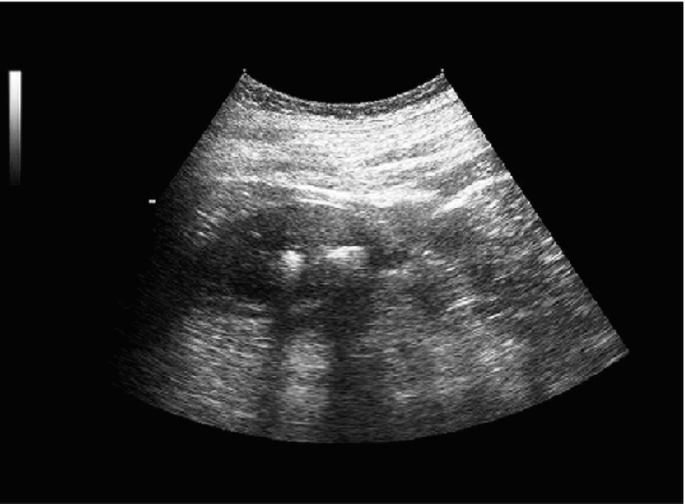

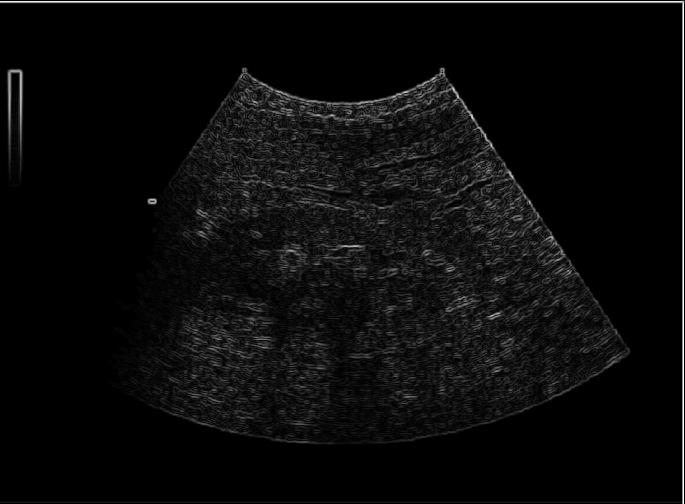